In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [3]:
# Convertir el archivo csv en un dataframe de pandas
dataset = pd.read_csv('DESERCION_ACADEMICA_PREGRADO_Y_POSGRADO.csv')
dataset.head(75)

,PERIODO,NOMBRE_FACULTAD,NOMBRE_PROGRAMA,JORNADA,MODALIDAD,NOMBRE_SEDE,TIPO_IDEN_EST,FECHA_NACIMIENTO,GENERO,ESTRATO,NOMBRE_ESTADO,ORIGEN_GEOGRAFICO,LUGAR_EXPEDICION
0,PRIMER SEMESTRE 2020,CIENCIAS DE LA EDUCACION,MAESTRIA EN EDUCACION,DIURNA - NOCTURA,PRESENCIAL,TUNJA,C.C.,09/22/1958 12:00:00 AM,M,SIN INFORMACIÓN,PERDIO CUPO A 052/2012 ART 15 LIT.B.,TUNJA,TUNJA
1,PRIMER SEMESTRE 2020,CIENCIAS DE LA EDUCACION,MAESTRIA EN EDUCACION,DIURNA - NOCTURA,PRESENCIAL,TUNJA,C.C.,03/19/1976 12:00:00 AM,F,SIN INFORMACIÓN,PERDIO CUPO A 052/2012 ART 15 LIT.A.,DUITAMA,DUITAMA
2,PRIMER SEMESTRE 2020,CIENCIAS DE LA EDUCACION,MAESTRIA EN EDUCACION,DIURNA - NOCTURA,PRESENCIAL,TUNJA,C.C.,10/21/1977 12:00:00 AM,F,SIN INFORMACIÓN,PERDIO CUPO A 052/2012 ART 15 LIT.B.,SOATÁ,SOATÁ
3,PRIMER SEMESTRE 2020,CIENCIAS DE LA EDUCACION,MAESTRIA EN HISTORIA,DIURNA - NOCTURA,PRESENCIAL,TUNJA,C.C.,07/16/1996 12:00:00 AM,M,SIN INFORMACIÓN,PERDIO CUPO A 052/2012 ART 15 LIT.A.,SOCHA,SOCHA
4,PRIMER SEMESTRE 2020,CIENCIAS DE LA EDUCACION,MAESTRIA EN LITERATURA,DIURNA - NOCTURA,PRESENCIAL,TUNJA,C.C.,11/07/1988 12:00:00 AM,F,SIN INFORMACIÓN,PERDIO CUPO A 052/2012 ART 15 LIT.A.,CÚCUTA,CÚCUTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,SEGUNDO SEMESTRE DE 2021,SECCIONAL DUITAMA,ESPECIALIZACION EN GESTION ESTRATEGICA DE PROY...,Otra,Presencial,DUITAMA,C.C.,04/17/1995 12:00:00 AM,F,SIN INFORMACIÓN,PERDIO CUPO A 052/2012 ART 15 LIT.A.,DUITAMA,DUITAMA
71,SEGUNDO SEMESTRE DE 2021,SECCIONAL DUITAMA,ESPECIALIZACION EN GESTION DE LA PRODUCTIVIDAD...,Extendida,Presencial,DUITAMA,C.C.,01/05/1993 12:00:00 AM,M,SIN INFORMACIÓN,PERDIO CUPO A 052/2012 ART 15 LIT.A.,SOGAMOSO,SOGAMOSO
72,SEGUNDO SEMESTRE DE 2021,SECCIONAL DUITAMA,ESPECIALIZACION EN ESTADISTICA,Otra,Presencial,DUITAMA,C.C.,08/18/1992 12:00:00 AM,F,SIN INFORMACIÓN,PERDIO CUPO A 052/2012 ART 15 LIT.B.,SOGAMOSO,BOGOTÁ D.C.
73,SEGUNDO SEMESTRE DE 2021,SECCIONAL SOGAMOSO,ESPECIALIZACION EN INGENIERIA DE PRODUCCION Y ...,Otra,Presencial,SOGAMOSO,C.C.,05/23/1984 12:00:00 AM,M,SIN INFORMACIÓN,PERDIO CUPO A 052/2012 ART 15 LIT.A.,BOGOTÁ D.C.,SOGAMOSO


In [4]:
# Realizar el conteo de los programas donde hay mas desercion y obtener el top 10
dataset = dataset.groupby('NOMBRE_PROGRAMA').size().reset_index()
dataset.columns = ['NOMBRE_PROGRAMA	', 'Cantidad']
dataset = dataset.sort_values('Cantidad', ascending=False)
dataset = dataset.head(10)

In [5]:
# Mostrar una tabla en la consola con el top 10
print(dataset)

                                    NOMBRE_PROGRAMA\t  Cantidad
6                      ESPECIALIZACION EN ESTRUCTURAS         7
22             MAESTRIA EN DIDACTICA DE LA MATEMATICA         6
24                              MAESTRIA EN EDUCACION         6
13  ESPECIALIZACION EN INGENIERIA DE PRODUCCION Y ...         4
2        ESPECIALIZACION EN ALTA GERENCIA DE EMPRESAS         4
3                   ESPECIALIZACION EN BASES DE DATOS         3
28                   MAESTRIA EN INGENIERIA AMBIENTAL         3
12  ESPECIALIZACION EN GESTION ESTRATEGICA DE PROY...         3
21                       MAESTRIA EN DERECHOS HUMANOS         2
20                  MAESTRIA EN CIENCIAS VETERINARIAS         2


In [6]:
# Obtener la frecuencia de cada programa
X = dataset.iloc[:, 1].values.astype(int)
X = X.reshape(-1, 1)


In [7]:
# seleccionar el nombrel programa
y = dataset.iloc[:, 0].values

In [8]:
# Convertir el nombre del programa a un número (Codificar) para entrenar el modelo
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [9]:
# Crear el modelo de regresión ARBOL DE DESICION 
regressor = DecisionTreeRegressor(random_state=0)

In [ ]:
# Entrenar el modelo
regressor.fit(X, y)

In [20]:
# Predecir
y_pred = regressor.predict([[7]])
y_pred = y_pred[0].astype(int)
print(y_pred)

2


In [12]:
# Obtener el nombre del programa
print("Técnica predecicha: ", labelencoder_y.inverse_transform([y_pred]))

Técnica predecicha:  ['ESPECIALIZACION EN ESTRUCTURAS']


In [13]:
# Graficar los datos Crear un rango de valores desde el valor mínimo de X hasta el valor máximo de X con una
# diferencia de 0.01 entre dos valores consecutivos (Valores falsos para predecir)
X_grid = np.arange(min(X), max(X), 0.01)

In [14]:
# Transponer el array para que sea un array de una columna
X_grid = X_grid.reshape((len(X_grid), 1))

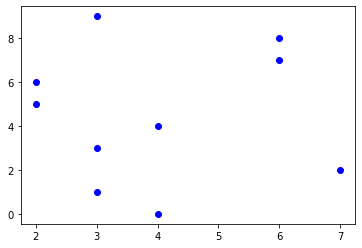

In [15]:
# Diagrama de dispersión con los valores generados
plt.scatter(X, y, color='blue')

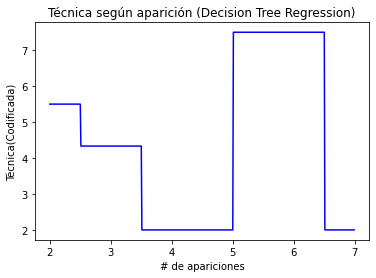

In [16]:
# Graficar los valores predichos
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Técnica según aparición (Decision Tree Regression)')
plt.xlabel('# de apariciones')
plt.ylabel('Técnica(Codificada)')
# Exportar gráfica como imagen
plt.savefig('graph.png')
# Mostrar la gráfica
plt.show()

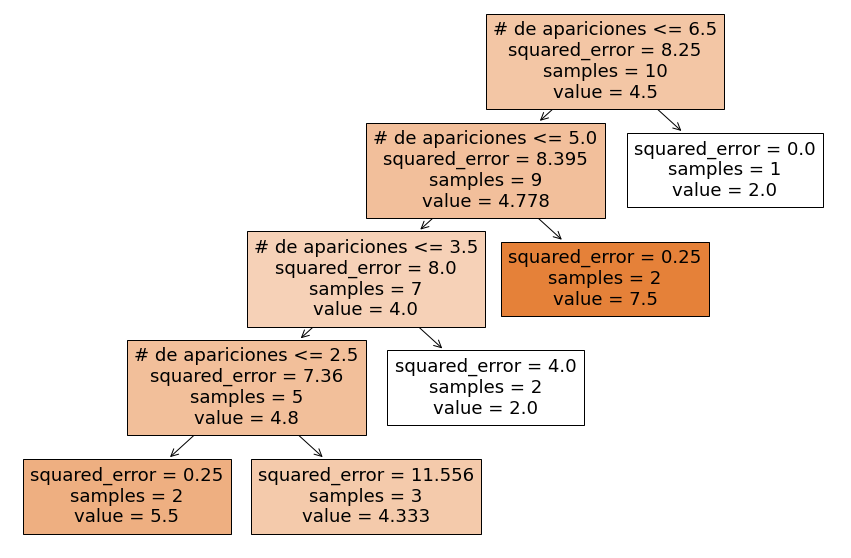

In [17]:
#árbol de decisión
plt.figure(figsize=(15, 10))
tree.plot_tree(regressor, filled=True, feature_names=['# de apariciones'], 
class_names=labelencoder_y.classes_)
# Exportar el árbol de decisión como imagen
plt.savefig('tree.png')
# Mostrar la gráfica
plt.show()